In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

media = [
    'NachDenkSeiten', 
    'taz', 
    'DER SPIEGEL', 
    'ARD', 
    'ZDF', 
    'Bayerischer Rundfunk', 
    'ntv Nachrichten', 
    'faz', 
    'WELT', 
    'BILD', 
    'COMPACTTV'
    ]
parties = [
    'linke',
    'grüne',
    'spd',
    'fdp',
    'cdu',
    'csu',
    'afd'
    ]
btw17 = {
    'linke': 69,
    'grüne': 67,
    'spd': 153,
    'fdp': 80,
    'cdu_csu': 246,
    'afd': 94,
}
btw21 = {
    'linke': 39,
    'grüne': 118,
    'spd': 206,
    'fdp': 92,
    'cdu_csu': 197,
    'afd': 83,
}

In [3]:
def a_pivot_df_medium_vs_party(input_df):
    output_df = pd.pivot_table(input_df, index='medium', columns='party', values='title', aggfunc='count', fill_value=0)
    return output_df

def b_sort_df_by_political_ideology(input_df):
    output_df = input_df.reindex(media)[parties]
    return output_df

def c_standardize_df_by_row_sum(input_df):
    output_df = input_df.div(input_df.sum(axis=1), axis=0)
    return output_df

def d_subtract_df_column_means(input_df):
    output_df = input_df - input_df.mean()
    return output_df
    
def e_heatmap_plot_df(input_df):
    f, ax = plt.subplots(figsize=(9, 8))
    f.subplots_adjust(left=0.15, bottom=.13, right=.99, top=.89)
    sns.heatmap(input_df, annot=True, linewidths=.5, ax=ax, fmt=".1%", center=np.nanmean(input_df), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())
    return

def f_saveplot_mentions_short(df, title, path, n_rows_in_title=1):
    from pathlib import Path
    import matplotlib as mpl
    import matplotlib.font_manager as fm
    import matplotlib.pyplot as plt
    mpl.use('pdf')

    fpath = Path(mpl.get_data_path(), "fonts/ttf/cmu_serif_roman.ttf")
    fprop = fm.FontProperties(fname=fpath)

    width = 6.2 #inches
    height = width

    font = {'family':'serif', 'serif': ['cmr10'], 'size':12}
    plt.rc('font',**font)
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)


    f, ax = plt.subplots(figsize=(9, 8))
    if n_rows_in_title==1:
        f.subplots_adjust(left=0.14, bottom=.15, right=.96, top=.93)
    elif n_rows_in_title==2:
        f.subplots_adjust(left=0.14, bottom=.15, right=.99, top=.88)
    else:
        return
    
    df_to_plot = df.copy()
    sns.heatmap(df_to_plot, annot=True, linewidths=.5, ax=ax, fmt=".1%", center=np.nanmean(df_to_plot), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())

    ax.set_xlabel('Party', fontsize=12, font=fpath, color='black')
    ax.set_ylabel('Medium', fontsize=12, font=fpath, color='black')
    ax.set_title(title, fontsize=12, font=fpath, color='black')
    ax.set_xticklabels(['Linke', 'Grüne', 'SPD', 'FDP', 'CDU', 'CSU', 'AfD'], size=12, font=fpath, color='black')
    ax.set_yticklabels(['NDS', 'taz', 'Sp', 'ARD', 'ZDF', 'BR', 'ntv', 'faz', 'WELT', 'BILD', 'CTV'], size=12, font=fpath, color='black')

    f.set_size_inches(width, height*11/21)
    f.savefig(path)
    return

def g_saveplot_mentions_per_seat(df, title, path, n_rows_in_title=1):
    from pathlib import Path
    import matplotlib as mpl
    import matplotlib.font_manager as fm
    import matplotlib.pyplot as plt
    mpl.use('pdf')

    fpath = Path(mpl.get_data_path(), "fonts/ttf/cmu_serif_roman.ttf")
    fprop = fm.FontProperties(fname=fpath)

    width = 6.2 #inches
    height = width

    font = {'family':'serif', 'serif': ['cmr10'], 'size':12}
    plt.rc('font',**font)
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)


    f, ax = plt.subplots(figsize=(9, 8))
    if n_rows_in_title==1:
        f.subplots_adjust(left=0.14, bottom=.15, right=.96, top=.93)
    elif n_rows_in_title==2:
        f.subplots_adjust(left=0.14, bottom=.15, right=.99, top=.88)
    else:
        return
    
    df_to_plot = df.copy()
    sns.heatmap(df_to_plot, annot=True, linewidths=.5, ax=ax, fmt=".3g", center=np.nanmean(df_to_plot), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())

    ax.set_xlabel('Party', fontsize=12, font=fpath, color='black')
    ax.set_ylabel('Medium', fontsize=12, font=fpath, color='black')
    ax.set_title(title, fontsize=12, font=fpath, color='black')
    ax.set_xticklabels(['Linke', 'Grüne', 'SPD', 'FDP', 'CDU/CSU', 'AfD'], size=12, font=fpath, color='black')
    if 'taz' in df_to_plot.index:
        ax.set_yticklabels(['NDS', 'taz', 'Sp', 'ARD', 'ZDF', 'BR', 'ntv', 'faz', 'WELT', 'BILD', 'CTV'], size=12, font=fpath, color='black')
    else:
        ax.set_yticklabels(['NDS', 'Sp', 'ARD', 'ZDF', 'BR', 'ntv', 'faz', 'WELT', 'BILD', 'CTV'], size=12, font=fpath, color='black')
    f.set_size_inches(width, height*11/21)
    f.savefig(path)
    return

In [4]:
politician_df = pd.read_pickle('../data/mentions/politician_mentions.pkl')
politician_df.head()

,medium,id,title,minute,date,search_term,extracted_string,party
0,ARD,Monitor,studioM: Grüne Kompromisse - Hauptsache Macht?,1,2021-02-12,lisa badum,diskutieren wir heute natürlich auch mit einer...,grüne
1,ARD,Monitor,studioM: Grüne Kompromisse - Hauptsache Macht?,5,2021-02-12,annalena baerbock,"ist. Und es steht außer Frage, dass die Grünen...",grüne
2,ARD,Monitor,studioM: Grüne Kompromisse - Hauptsache Macht?,14,2021-02-12,robert habeck,"sein. Auf der Pressekonferenz, wo der Koalitio...",grüne
3,ARD,Monitor,studioM: Grüne Kompromisse - Hauptsache Macht?,25,2021-02-12,annalena baerbock,der Außengrenze an der EU-Außengrenze zu rügen...,grüne
4,ARD,Monitor,studioM: Grüne Kompromisse - Hauptsache Macht?,31,2021-02-12,paul ziemiak,"so, dass in einigen Bereichen da durchaus Verb...",cdu


In [5]:
politician_df.search_term.value_counts().head(10)

olaf scholz          13114
armin laschet         7175
friedrich merz        4250
annalena baerbock     4040
karl lauterbach       3197
robert habeck         3062
jens spahn            2594
christian lindner     2565
heiko maas             901
norbert röttgen        696
Name: search_term, dtype: int64

In [6]:
politician_mentions_2017_by_party_df = a_pivot_df_medium_vs_party(politician_df[(politician_df.date.dt.year > 2017) & (politician_df.date.dt.year < 2021)])
politician_mentions_2021_by_party_df = a_pivot_df_medium_vs_party(politician_df[politician_df.date.dt.year > 2021])
politician_mentions_by_party_df = a_pivot_df_medium_vs_party(politician_df)
politician_mentions_by_party_df

party,afd,cdu,csu,fdp,grüne,linke,spd
medium,,,,,,,
ARD,21,296,22,95,183,33,437
BILD,49,5874,302,1409,1885,121,5337
Bayerischer Rundfunk,15,30,32,8,41,8,36
COMPACTTV,62,92,2,27,88,86,123
DER SPIEGEL,56,508,70,201,347,58,526
NachDenkSeiten,13,220,25,28,140,168,361
WELT,89,5786,509,1723,4813,343,9618
ZDF,90,3395,184,695,1432,222,3247
faz,22,441,85,97,307,40,569


In [7]:
ordered_politician_mentions_2017_by_party_df = b_sort_df_by_political_ideology(politician_mentions_2017_by_party_df)
ordered_politician_mentions_2021_by_party_df = b_sort_df_by_political_ideology(politician_mentions_2021_by_party_df)
ordered_politician_mentions_by_party_df = b_sort_df_by_political_ideology(politician_mentions_by_party_df)
#export for sentiment analysis
ordered_politician_mentions_by_party_df.to_pickle('../data/sentiment/politician_mentions.pkl')
ordered_politician_mentions_by_party_df

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,168,140,361,28,220,25,13
taz,55,139,123,40,93,13,7
DER SPIEGEL,58,347,526,201,508,70,56
ARD,33,183,437,95,296,22,21
ZDF,222,1432,3247,695,3395,184,90
Bayerischer Rundfunk,8,41,36,8,30,32,15
ntv Nachrichten,53,413,1112,219,1300,86,55
faz,40,307,569,97,441,85,22
WELT,343,4813,9618,1723,5786,509,89


In [8]:
proportion_politician_mentions_2017_by_party_df = c_standardize_df_by_row_sum(ordered_politician_mentions_2017_by_party_df)
proportion_politician_mentions_2021_by_party_df = c_standardize_df_by_row_sum(ordered_politician_mentions_2021_by_party_df)
proportion_politician_mentions_by_party_df = c_standardize_df_by_row_sum(ordered_politician_mentions_by_party_df)
proportion_politician_mentions_by_party_df

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,0.175916,0.146597,0.378010,0.029319,0.230366,0.026178,0.013613
taz,0.117021,0.295745,0.261702,0.085106,0.197872,0.027660,0.014894
DER SPIEGEL,0.032843,0.196489,0.297848,0.113817,0.287656,0.039638,0.031710
ARD,0.030359,0.168353,0.402024,0.087397,0.272309,0.020239,0.019319
ZDF,0.023961,0.154560,0.350459,0.075013,0.366433,0.019860,0.009714
Bayerischer Rundfunk,0.047059,0.241176,0.211765,0.047059,0.176471,0.188235,0.088235
ntv Nachrichten,0.016368,0.127548,0.343422,0.067634,0.401482,0.026560,0.016986
faz,0.025625,0.196669,0.364510,0.062140,0.282511,0.054452,0.014094
WELT,0.014991,0.210349,0.420349,0.075303,0.252874,0.022246,0.003890


In [9]:
ordered_politician_mentions_2017_by_party_df

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,135,57,246,18,146,18,11
taz,20,52,33,17,21,3,7
DER SPIEGEL,19,123,226,70,239,50,14
ARD,0,3,16,4,21,8,4
ZDF,33,90,422,78,419,73,44
Bayerischer Rundfunk,0,23,13,5,23,8,1
ntv Nachrichten,20,81,298,44,331,22,36
faz,25,88,238,24,195,63,19
WELT,56,82,685,66,1127,72,23


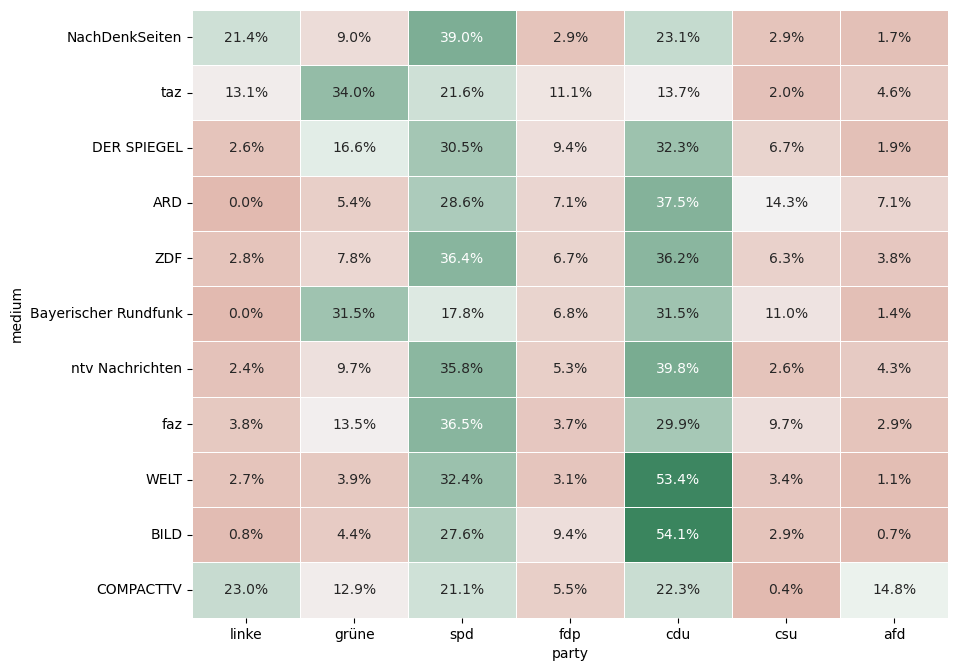

In [10]:
e_heatmap_plot_df(proportion_politician_mentions_2017_by_party_df)

In [11]:
ordered_politician_mentions_2021_by_party_df

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,11,38,31,2,1,0,2
taz,9,19,20,2,9,1,0
DER SPIEGEL,7,67,93,40,50,5,11
ARD,18,89,195,53,75,0,4
ZDF,75,499,899,171,373,49,17
Bayerischer Rundfunk,0,6,1,2,1,0,1
ntv Nachrichten,7,124,240,31,123,19,4
faz,6,140,151,47,50,13,2
WELT,185,4126,7166,1307,2489,313,43


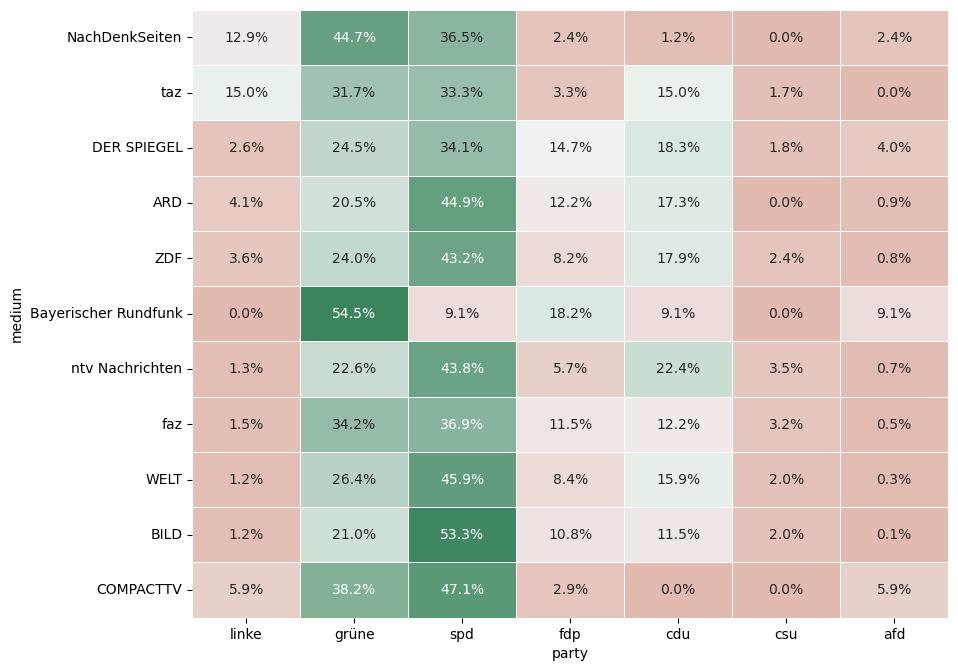

In [12]:
e_heatmap_plot_df(proportion_politician_mentions_2021_by_party_df)

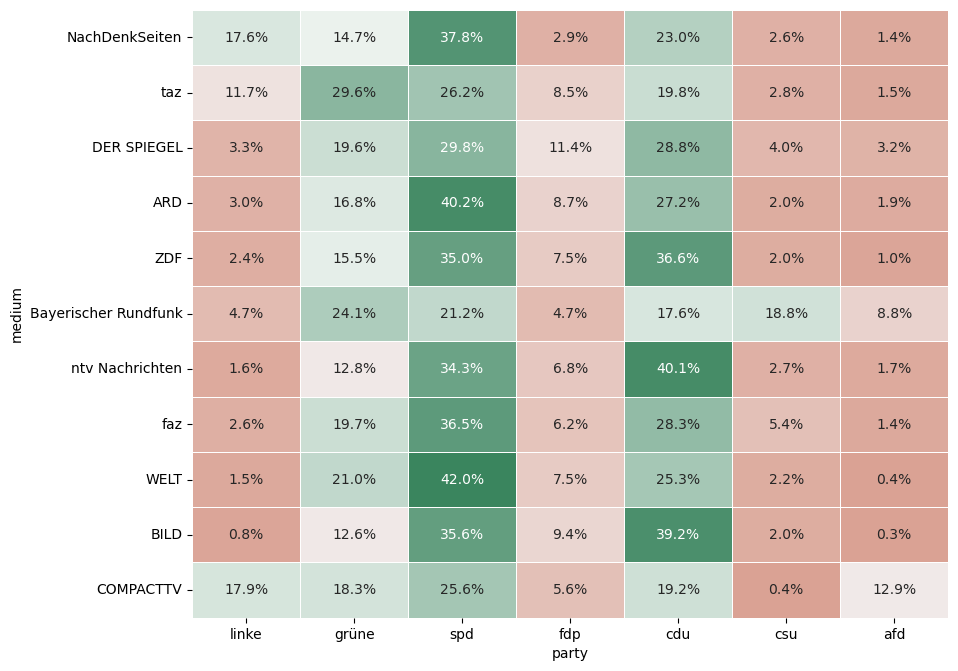

In [13]:
e_heatmap_plot_df(proportion_politician_mentions_by_party_df)

In [14]:
deviations_politician_mentions_2017_by_party_df = d_subtract_df_column_means(proportion_politician_mentions_2017_by_party_df)
deviations_politician_mentions_2021_by_party_df = d_subtract_df_column_means(proportion_politician_mentions_2021_by_party_df)
deviations_politician_mentions_by_party_df = d_subtract_df_column_means(proportion_politician_mentions_by_party_df)
deviations_politician_mentions_by_party_df

party,linke,grüne,spd,fdp,cdu,csu,afd
medium,,,,,,,
NachDenkSeiten,0.114881,-0.039465,0.046857,-0.042782,-0.047074,-0.014676,-0.017741
taz,0.055986,0.109683,-0.069451,0.013005,-0.079568,-0.013195,-0.016460
DER SPIEGEL,-0.028193,0.010427,-0.033305,0.041715,0.010216,-0.001217,0.000356
ARD,-0.030676,-0.017709,0.070871,0.015295,-0.005131,-0.020615,-0.012035
ZDF,-0.037074,-0.031502,0.019306,0.002912,0.088993,-0.020995,-0.021640
Bayerischer Rundfunk,-0.013976,0.055115,-0.119388,-0.025043,-0.100970,0.147381,0.056881
ntv Nachrichten,-0.044667,-0.058514,0.012269,-0.004467,0.124042,-0.014295,-0.014368
faz,-0.035411,0.010607,0.033357,-0.009962,0.005071,0.013598,-0.017260
WELT,-0.046045,0.024287,0.089196,0.003201,-0.024567,-0.018609,-0.027464


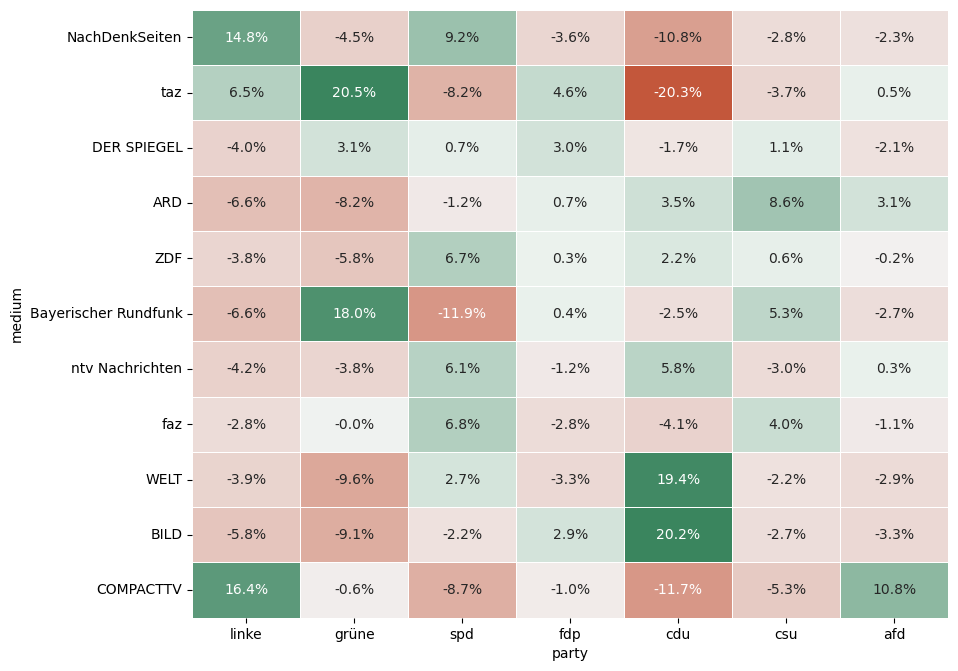

In [15]:
e_heatmap_plot_df(deviations_politician_mentions_2017_by_party_df)

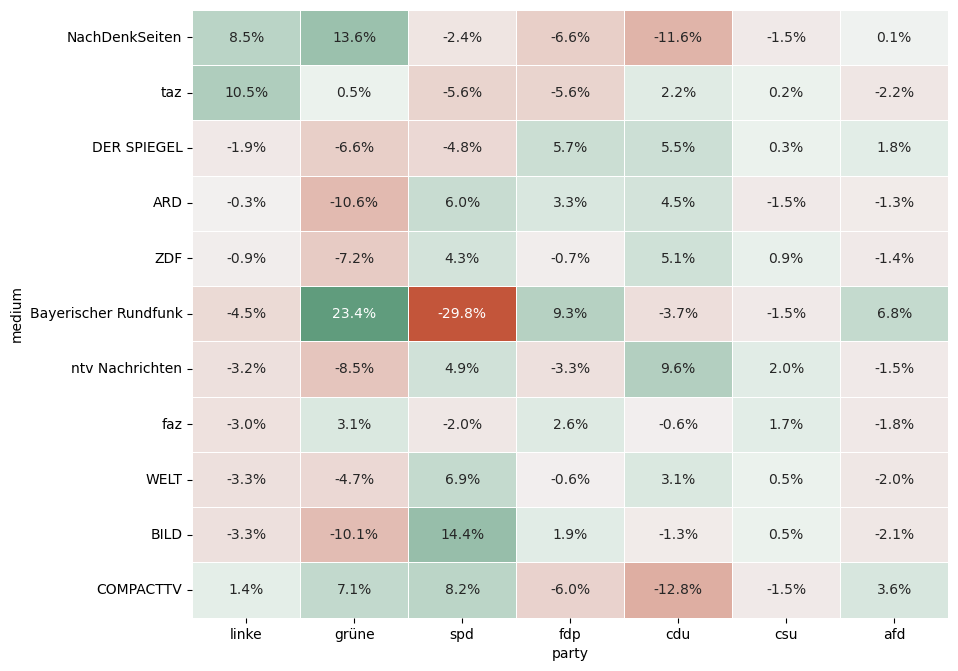

In [16]:
e_heatmap_plot_df(deviations_politician_mentions_2021_by_party_df)

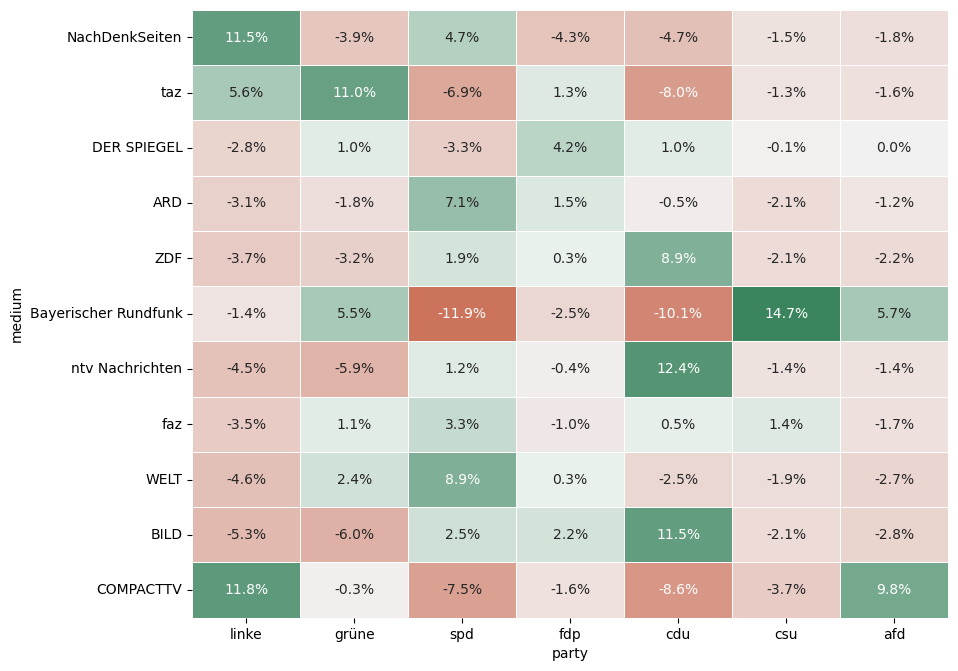

In [17]:
e_heatmap_plot_df(deviations_politician_mentions_by_party_df)

In [18]:
f_saveplot_mentions_short(df=proportion_politician_mentions_by_party_df, title='Proportion of Politician Mentions by Party and Medium', path='../results/englisch/erwähnungen_politiker_gekuerzt.pdf')
f_saveplot_mentions_short(df=deviations_politician_mentions_by_party_df, title='Proportion of Politician Mentions by Party and Medium (zero mean)', path='../results/englisch/erwähnungen_politiker_gekuerzt_mittelwertfrei.pdf', n_rows_in_title=1)

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_62846/1724916569.py:44: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()
/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_62846/1724916569.py:44: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


In [19]:
politician_mentions_2017 = ordered_politician_mentions_2017_by_party_df.copy()

politician_mentions_2017['cdu_csu'] = politician_mentions_2017['cdu'] + politician_mentions_2017['csu']
politician_mentions_2017.drop(columns=['cdu', 'csu'], inplace=True)
politician_mentions_2017 = politician_mentions_2017[['linke', 'grüne', 'spd', 'fdp', 'cdu_csu', 'afd']]

In [20]:
politician_mentions_17 = politician_mentions_2017.copy()
for party in btw17.keys():
    politician_mentions_17[party] /= btw17[party]

politician_mentions_17_standardized = politician_mentions_17.div(politician_mentions_17['afd'], axis=0)

f, ax = plt.subplots(figsize=(9, 8))
f.subplots_adjust(left=0.15, bottom=.13, right=.99, top=.89)
sns.heatmap(politician_mentions_17_standardized, annot=True, linewidths=.5, ax=ax, fmt="1.2", center=np.nanmean(politician_mentions_17_standardized), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())
plt.title('politician mentions pro sitz im bundestag 2017, standardisiert auf afd')

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_62846/1964405640.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'politician mentions pro sitz im bundestag 2017, standardisiert auf afd')

/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  func(*args, **kwargs)


In [21]:
politician_mentions_2021 = ordered_politician_mentions_2021_by_party_df.copy()

politician_mentions_2021['cdu_csu'] = politician_mentions_2021['cdu'] + politician_mentions_2021['csu']
politician_mentions_2021.drop(columns=['cdu', 'csu'], inplace=True)
politician_mentions_2021 = politician_mentions_2021[['linke', 'grüne', 'spd', 'fdp', 'cdu_csu', 'afd']]

In [22]:
politician_mentions_21 = politician_mentions_2021.copy()
for party in btw21.keys():
    politician_mentions_21[party] /= btw21[party]

politician_mentions_21_standardized = politician_mentions_21.div(politician_mentions_21['afd'], axis=0).replace([np.inf, -np.inf], np.nan).dropna()

f, ax = plt.subplots(figsize=(9, 8))
f.subplots_adjust(left=0.15, bottom=.13, right=.99, top=.89)
sns.heatmap(politician_mentions_21_standardized, annot=True, linewidths=.5, ax=ax, fmt="1.2", center=np.nanmean(politician_mentions_21_standardized), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())
plt.title('politician mentions pro sitz im bundestag 2021, standardisiert auf afd\ntaz entfernt weil keine afd politician mentions vorhanden waren')

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_62846/3572737740.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


Text(0.5, 1.0, 'politician mentions pro sitz im bundestag 2021, standardisiert auf afd\ntaz entfernt weil keine afd politician mentions vorhanden waren')

/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  func(*args, **kwargs)


In [24]:
g_saveplot_mentions_per_seat(df=politician_mentions_17_standardized, title='Politician Mentions Per Bundestag Seat 2017, Normalized', path='../results/englisch/erwähnungen_politiker_gekuerzt_pro_sitz_2017.pdf')
g_saveplot_mentions_per_seat(df=politician_mentions_21_standardized, title='Politician Mentions Per Bundestag Seat 2021, Normalized', path='../results/englisch/erwähnungen_politiker_gekuerzt_pro_sitz_2021.pdf')

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_62846/1724916569.py:86: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_62846/1724916569.py:86: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


In [25]:
politician_mentions_17_standardized.drop(['NachDenkSeiten', 'Bayerischer Rundfunk', 'COMPACTTV']).mean().plot()
politician_mentions_21_standardized.drop(['NachDenkSeiten', 'Bayerischer Rundfunk', 'COMPACTTV']).mean().plot()
plt.title('durchschnitt aller medien (ausgenommen extreme), politician mentions pro sitz im bundestag, standardisiert auf afd\nblau 2017, orange 2021')

Text(0.5, 1.0, 'durchschnitt aller medien (ausgenommen extreme), politician mentions pro sitz im bundestag, standardisiert auf afd\nblau 2017, orange 2021')

In [26]:
politician_lineplot_df = pd.DataFrame()
politician_lineplot_df['2017'] = politician_mentions_17_standardized.drop(['NachDenkSeiten', 'Bayerischer Rundfunk', 'COMPACTTV']).mean()
politician_lineplot_df['2021'] = politician_mentions_21_standardized.drop(['NachDenkSeiten', 'Bayerischer Rundfunk', 'COMPACTTV']).mean()
politician_lineplot_df = politician_lineplot_df.T
politician_lineplot_df['year'] = politician_lineplot_df.index
politician_lineplot_df = pd.melt(politician_lineplot_df, id_vars=['year'], value_vars=['linke', 'grüne', 'spd', 'fdp', 'cdu_csu', 'afd'])
politician_lineplot_df.columns = ['Year', 'party', 'value']
politician_lineplot_df.to_pickle('../data/mentions/lineplot_politicians.pkl')

In [27]:
print(pd.DataFrame(proportion_politician_mentions_by_party_df.mean(axis=0)).transpose().to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
party &     linke &     grüne &       spd &       fdp &      cdu &       csu &       afd \\
\midrule
0 &  0.061035 &  0.186062 &  0.331153 &  0.072101 &  0.27744 &  0.040854 &  0.031354 \\
\bottomrule
\end{tabular}



/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_62846/1254010828.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(proportion_politician_mentions_by_party_df.mean(axis=0)).transpose().to_latex())
